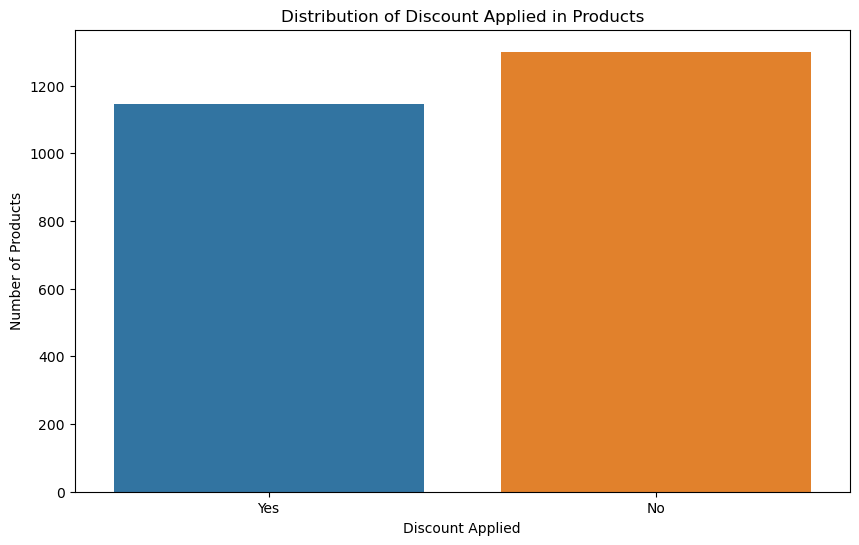

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


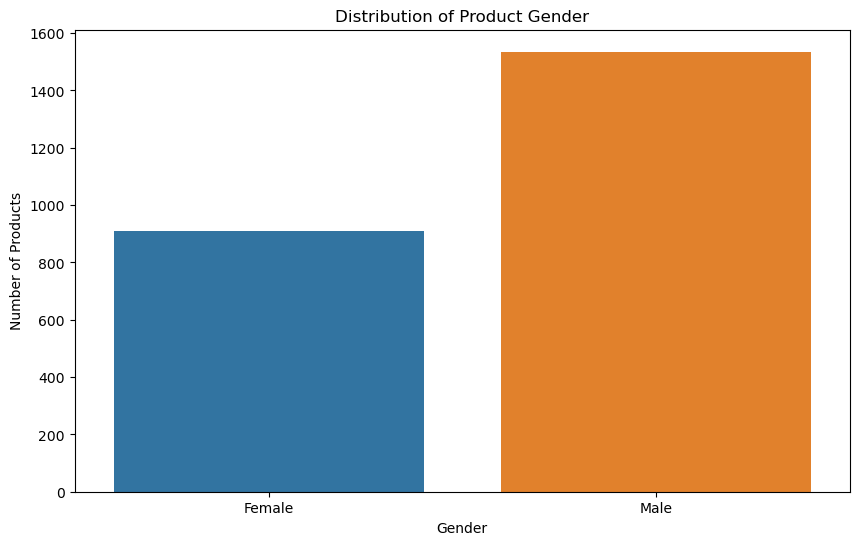

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


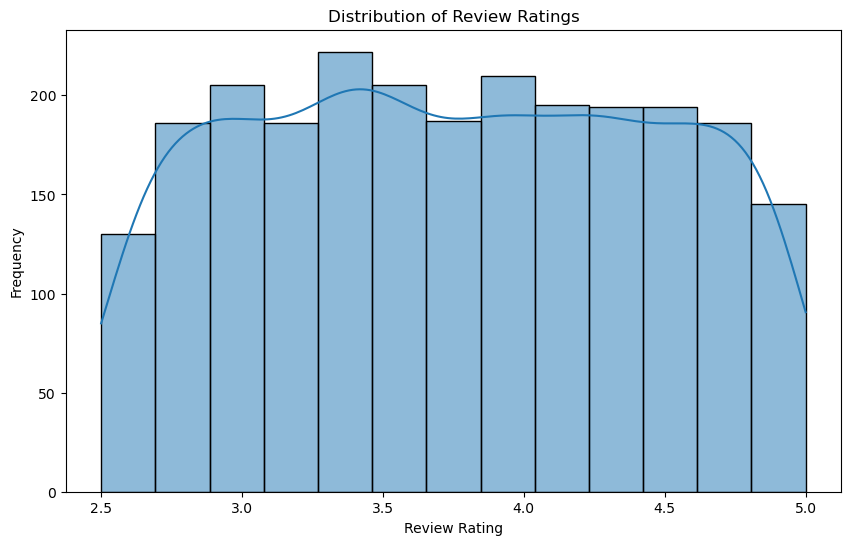

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


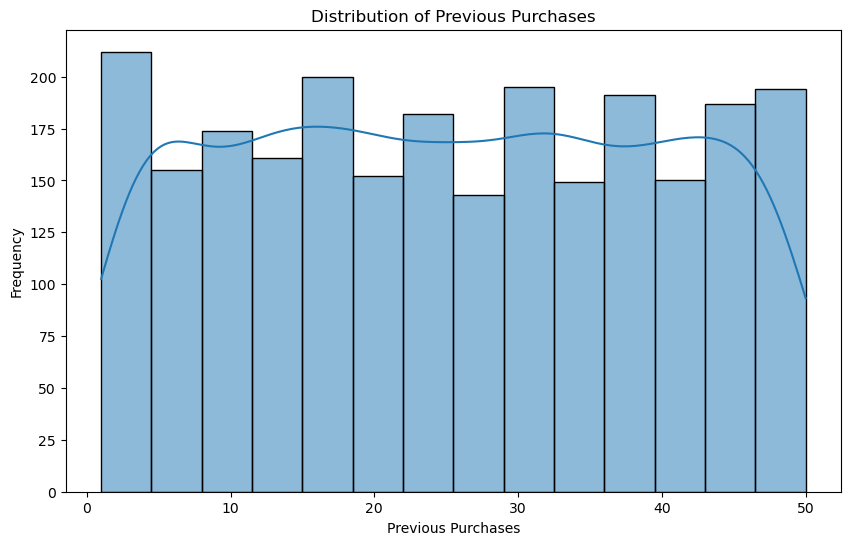

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


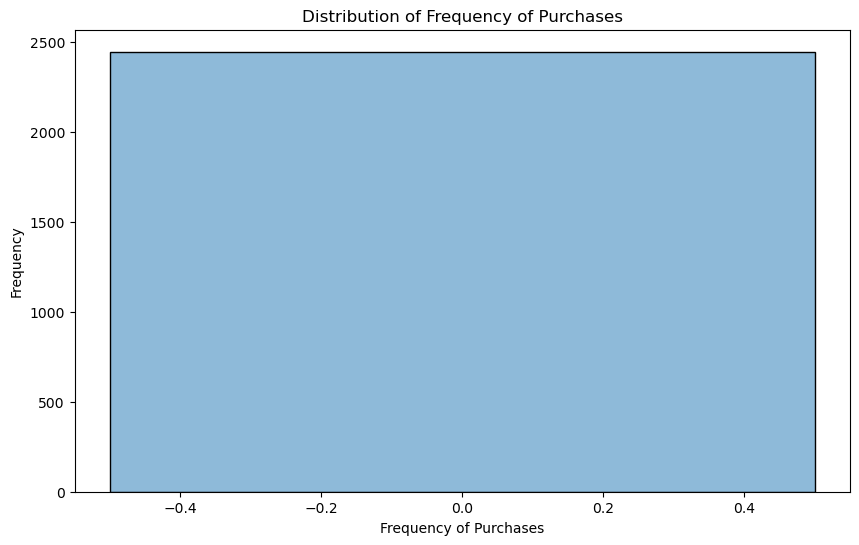

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


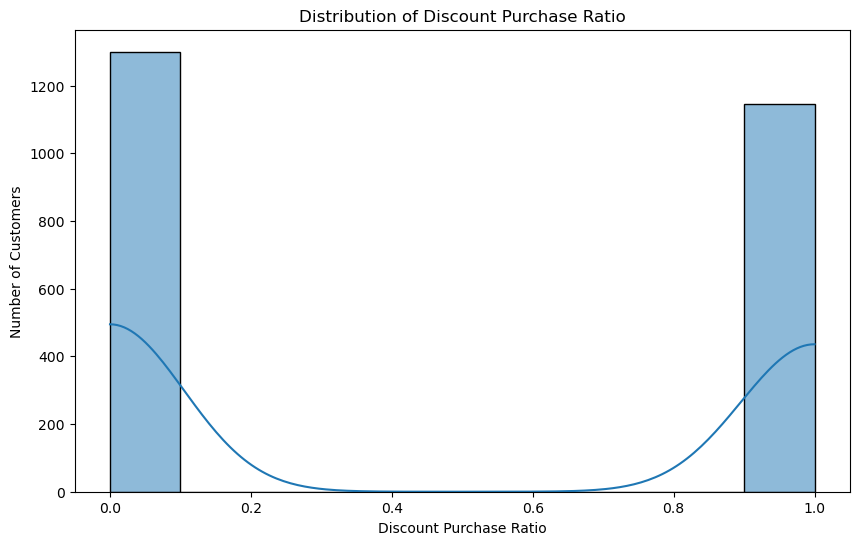

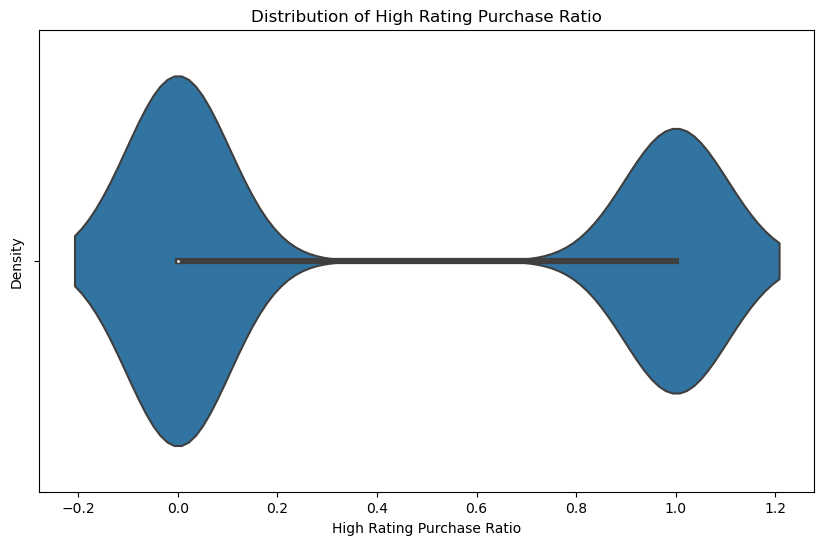

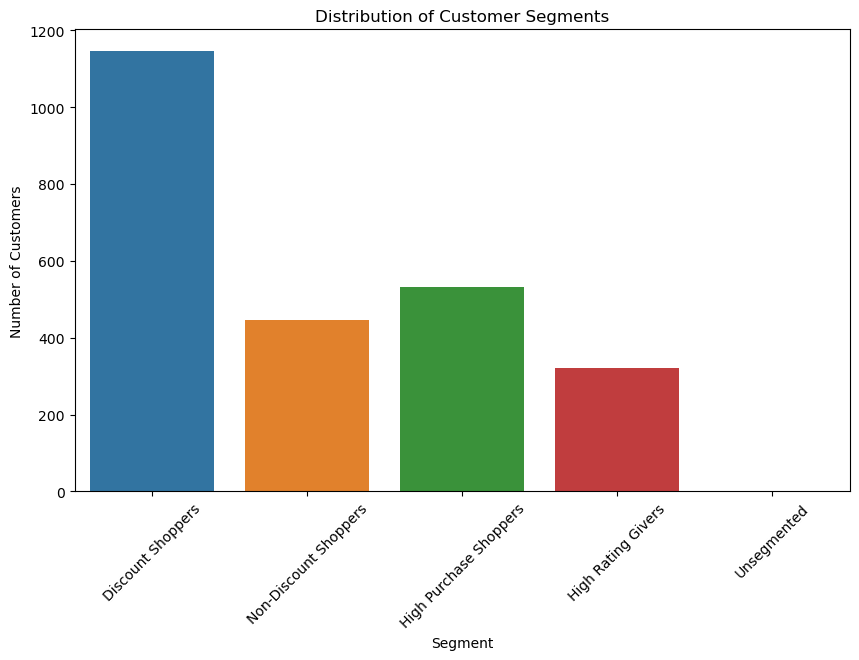

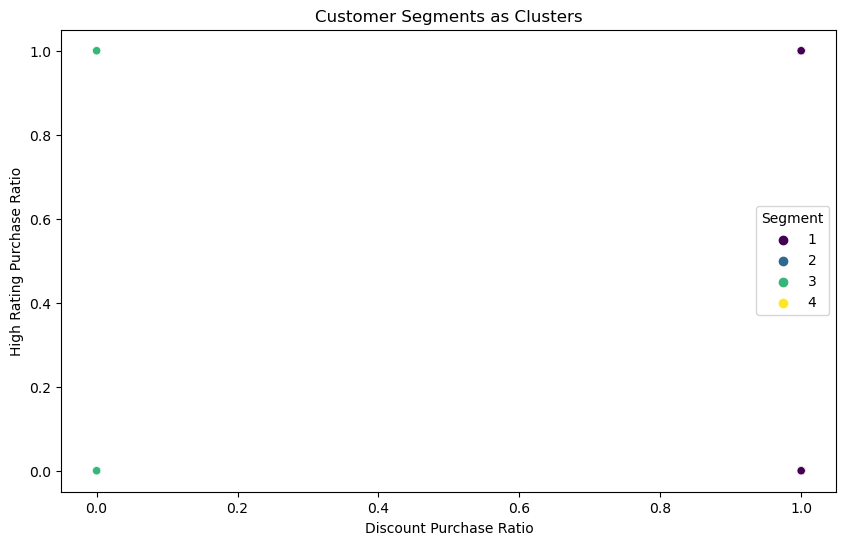

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00       111
           4       1.00      1.00      1.00        62

    accuracy                           1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489



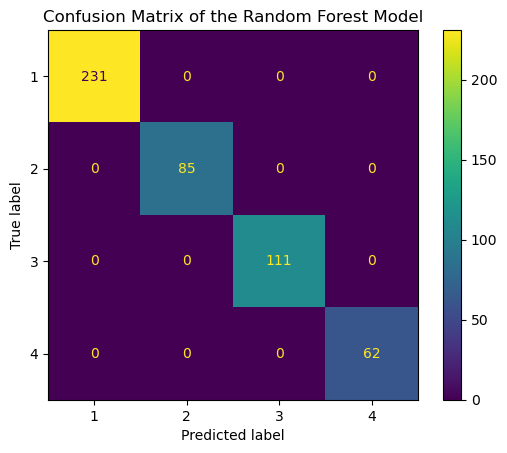

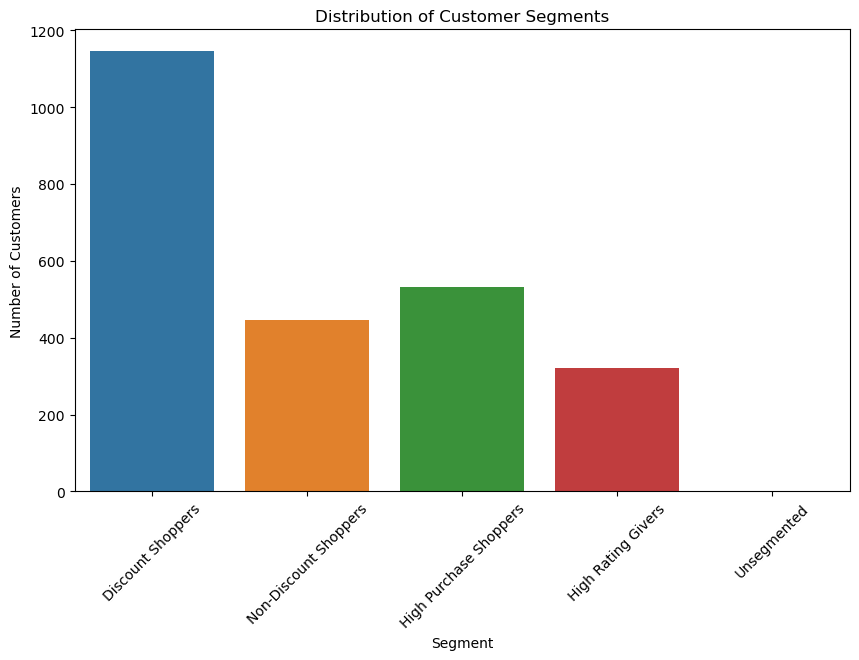

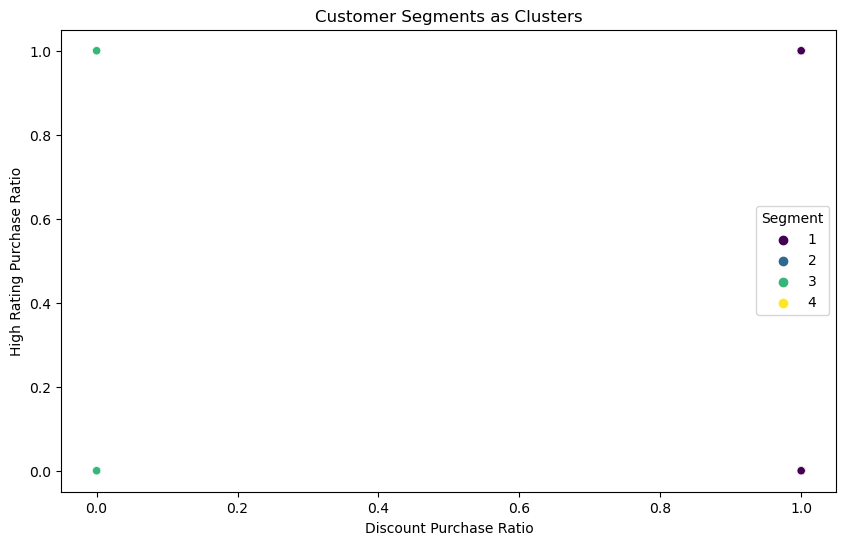

Customer ID: 2035
Customer Segment: Customer who buy non discount products
Recommended Products:
     Gender Item_Purchased Size      Color    Sku_ID  Review_Rating  \
1146   Male          Shoes    M      Olive  SKU_1147            3.4   
1148   Male         Blouse    M       Pink  SKU_1149            4.6   
1150   Male           Coat    M      Black  SKU_1151            3.2   
1157   Male       Sneakers    M   Lavender  SKU_1158            3.9   
1158   Male     Sunglasses    M      Brown  SKU_1159            3.0   
1175   Male        Handbag    M      Green  SKU_1176            2.9   
1188   Male        Sandals    M      Brown  SKU_1189            3.1   
1190   Male       Backpack    M       Pink  SKU_1191            4.3   
1192   Male        Sweater    M   Lavender  SKU_1193            3.7   
1194   Male           Belt    M        Red  SKU_1195            4.9   
1195   Male        T-shirt    M       Pink  SKU_1196            3.7   
1208   Male        Sweater    M  Turquoise  SKU_120

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the actual product table
product_df = pd.read_csv('product_data.csv')

# Ensure 'Discount_Applied' and 'Gender' columns are in the correct format
product_df['Discount_Applied'] = product_df['Discount_Applied'].map({'Yes': 'Yes', 'No': 'No'})
product_df['Gender'] = product_df['Gender'].astype('category')

# Visualize product data
def visualize_product_data():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Discount_Applied', data=product_df)
    plt.title('Distribution of Discount Applied in Products')
    plt.xlabel('Discount Applied')
    plt.ylabel('Number of Products')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Gender', data=product_df)
    plt.title('Distribution of Product Gender')
    plt.xlabel('Gender')
    plt.ylabel('Number of Products')
    plt.show()

visualize_product_data()

# Load customer purchase history data
df = pd.read_csv('customer_purchase_data.csv')

# Convert 'Yes'/'No' in 'Discount_Applied' to 1/0
df['Discount_Applied'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})

# Ensure numeric columns are indeed numeric and handle non-numeric values
numeric_columns = ['Review_Rating', 'Discount_Applied', 'Previous_Purchases', 'Frequency of Purchases']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Visualize customer purchase data
def visualize_customer_data():
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Review_Rating'], kde=True)
    plt.title('Distribution of Review Ratings')
    plt.xlabel('Review Rating')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Previous_Purchases'], kde=True)
    plt.title('Distribution of Previous Purchases')
    plt.xlabel('Previous Purchases')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Frequency of Purchases'], kde=True)
    plt.title('Distribution of Frequency of Purchases')
    plt.xlabel('Frequency of Purchases')
    plt.ylabel('Frequency')
    plt.show()

visualize_customer_data()

# Feature Engineering
high_rating_threshold = 4

df['Discount_Purchase_Ratio'] = df.groupby('Customer_ID')['Discount_Applied'].transform('sum') / df.groupby('Customer_ID')['Item_Purchased_ID'].transform('count')
df['High_Rating_Purchase_Ratio'] = df.apply(lambda x: 1 if x['Review_Rating'] >= high_rating_threshold else 0, axis=1)
df['High_Rating_Purchase_Ratio'] = df.groupby('Customer_ID')['High_Rating_Purchase_Ratio'].transform('sum') / df.groupby('Customer_ID')['Item_Purchased_ID'].transform('count')
df['Previous_Purchases'] = df.groupby('Customer_ID')['Previous_Purchases'].transform('max')
df['Frequency_of_Purchases'] = df.groupby('Customer_ID')['Frequency of Purchases'].transform('max')

# Visualize feature engineering with different charts
def visualize_features():
    # Histogram for Discount Purchase Ratio
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Discount_Purchase_Ratio'], bins=10, kde=True)
    plt.title('Distribution of Discount Purchase Ratio')
    plt.xlabel('Discount Purchase Ratio')
    plt.ylabel('Number of Customers')
    plt.show()
    
    # Violin Plot for High Rating Purchase Ratio
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df['High_Rating_Purchase_Ratio'])
    plt.title('Distribution of High Rating Purchase Ratio')
    plt.xlabel('High Rating Purchase Ratio')
    plt.ylabel('Density')
    plt.show()

visualize_features()

# Define segments with clear and mutually exclusive conditions
conditions = [
    (df['Discount_Applied'] == 1),  # Customer who shop more on discount products
    (df['Discount_Applied'] == 0) & (df['Previous_Purchases'] < 30) & (df['Review_Rating'] < high_rating_threshold),  # Customer who buy non discount products
    (df['Previous_Purchases'] >= 30),  # Customer who’s Previous Purchases are 30 and more
    (df['Review_Rating'] >= high_rating_threshold)  # Customer who give ratings 4 and more
]

# Assign segment IDs
choices = [1, 2, 3, 4]

# Apply the conditions
df['Segment'] = np.select(conditions, choices, default=0)

# Correct segment names for plotting
segment_names = {
    1: "Discount Shoppers",
    2: "Non-Discount Shoppers",
    3: "High Purchase Shoppers",
    4: "High Rating Givers",
    0: "Unsegmented"
}

# Map segment names
df['Segment_Name'] = df['Segment'].map(segment_names)

# Visualize segments
def visualize_segments():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Segment_Name', data=df, order=segment_names.values())
    plt.title('Distribution of Customer Segments')
    plt.xlabel('Segment')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

visualize_segments()

# Visualize segments as clusters
def visualize_clusters():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Discount_Purchase_Ratio', y='High_Rating_Purchase_Ratio', hue='Segment', palette='viridis')
    plt.title('Customer Segments as Clusters')
    plt.xlabel('Discount Purchase Ratio')
    plt.ylabel('High Rating Purchase Ratio')
    plt.show()

visualize_clusters()

# Train a model to predict the segment
features = ['Discount_Purchase_Ratio', 'High_Rating_Purchase_Ratio', 'Frequency_of_Purchases', 'Previous_Purchases']
X = df[features]
y = df['Segment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize model performance
def visualize_model_performance():
    from sklearn.metrics import ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title('Confusion Matrix of the Random Forest Model')
    plt.show()

visualize_model_performance()

# Function to segment a single customer using the trained model
def segment_customer(customer_id):
    customer_data = df.loc[df['Customer_ID'] == customer_id, features]
    
    if customer_data.empty:
        print("Customer ID not found.")
        return None
    
    features_data = customer_data.iloc[0].values.reshape(1, -1)
    segment = model.predict(features_data)[0]
    return segment

# Function to recommend products based on the segment, customer gender, and size
def recommend_products(segment, gender, size, previous_purchases):
    if segment == 1:
        recommendations = product_df.loc[(product_df['Discount_Applied'] == 'Yes') & (product_df['Size'] == size) & ((product_df['Gender'] == gender) | (product_df['Gender'] == 'Unisex'))]
    elif segment == 2:
        recommendations = product_df.loc[(product_df['Discount_Applied'] == 'No') & (product_df['Size'] == size) & ((product_df['Gender'] == gender) | (product_df['Gender'] == 'Unisex'))]
    elif segment == 3:
        recommendations = product_df.loc[(product_df['Size'] == size) & ((product_df['Gender'] == gender) | (product_df['Gender'] == 'Unisex'))].copy()
        if previous_purchases >= 30:
            recommendations['Discount_Applied'] = 'Yes'  # Apply additional discount for high purchase customers
            recommendations['Price'] = recommendations['Price'] * 0.8  # Apply 20% discount
    elif segment == 4:
        recommendations = product_df.loc[(product_df['Review_Rating'] >= high_rating_threshold) & (product_df['Size'] == size) & ((product_df['Gender'] == gender) | (product_df['Gender'] == 'Unisex'))]
    else:
        recommendations = product_df.loc[(product_df['Size'] == size) & ((product_df['Gender'] == gender) | (product_df['Gender'] == 'Unisex'))]
    
    # Limit the recommendations to 20 products or less
    recommendations = recommendations.head(20)
    
    return recommendations

# Function to calculate total amount, discount applied, and net total
def calculate_totals(recommendations, previous_purchases):
    total_amount = recommendations['Price'].sum()
    discount_applied = 0
    if previous_purchases >= 30 and 'Yes' in recommendations['Discount_Applied'].values:
        discount_applied = total_amount * 0.2
    net_total = total_amount - discount_applied
    return total_amount, discount_applied, net_total

# Prompt user for Customer_ID and produce recommendations
def main():
    visualize_segments()
    visualize_clusters()
    
    customer_id = int(input("Enter Customer ID: "))
    customer_data = df.loc[df['Customer_ID'] == customer_id]
    if customer_data.empty:
        print("Customer ID not found.")
        return
    
    customer_gender = customer_data['Gender'].iloc[0]
    customer_segment = segment_customer(customer_id)
    if customer_segment is None:
        return
    
    # Get the most common size purchased by the customer
    customer_size = customer_data['Size'].mode()[0]
    previous_purchases = customer_data['Previous_Purchases'].max()
    
    recommended_products = recommend_products(customer_segment, customer_gender, customer_size, previous_purchases)
    total_amount, discount_applied, net_total = calculate_totals(recommended_products, previous_purchases)
    
    segment_names = {
        1: "Customer who do shop more on discount products",
        2: "Customer who buy non discount products",
        3: "Customer who’s Previous Purchases are 30 and more",
        4: "Customer who give ratings 4 and more"
    }
    
    print(f"Customer ID: {customer_id}")
    print(f"Customer Segment: {segment_names[customer_segment]}")
    print("Recommended Products:")
    print(recommended_products)
    print(f"Total Amount: ${total_amount:.2f}")
    print(f"Discount Applied: ${discount_applied:.2f} (20% Discount Applied)" if discount_applied > 0 else "Discount Applied: $0.00")
    print(f"Net Total: ${net_total:.2f}")

if __name__ == "__main__":
    main()
